# Modelos Multiplos Preditivos - Cap. 8
## 0 - Bibliotecas importadas

In [50]:
import pandas as pd

## 1 - Carregando dataset 'Wine Quality'
* Dados numéricos;
* Não houve necessidade de fazer tratamento quanto a falta ou inconsistência nos dados;
* 11 características e target sendo sobre a qualidade do vinho (0-qualidade ruim- até 10-Excelente qualidade-);
* Não está balanceado (há mais vinhos normais do que excelentes ou ruins);

### Vinho Branco

In [116]:
df_white = pd.read_csv('./winequality-white.csv', sep = ';')
print("Quantidade amostra = ",df_white['quality'].count())
df_white.head()

Quantidade amostra =  4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Text(0, 0.5, 'Frequência')

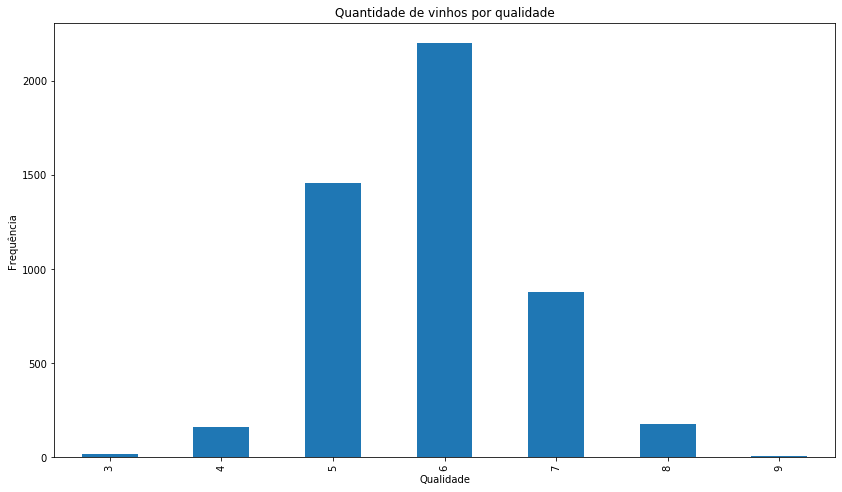

In [108]:
ax = df_white['quality'].value_counts().sort_index().plot.bar(
                                    y = [1,2,3,4,5,6,7,8,9,10,11],
                                    figsize=(14,8),
                                    title="Quantidade de vinhos por qualidade"
                                    )
ax.set_xlabel("Qualidade")
ax.set_ylabel("Frequência")

### Vinho Vermelho

In [117]:
df_red = pd.read_csv('./winequality-red.csv', sep = ';')
print("Quantidade amostra = ",df_red['quality'].count())
df_red.head()

Quantidade amostra =  1599


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0, 0.5, 'Frequência')

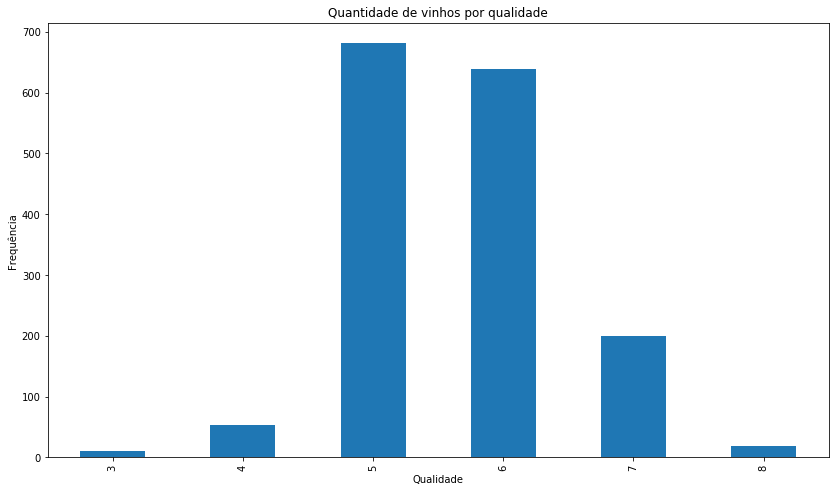

In [112]:
ax = df_red['quality'].value_counts().sort_index().plot.bar(
                                    y = [1,2,3,4,5,6,7,8,9,10,11],
                                    figsize=(14,8),
                                    title="Quantidade de vinhos por qualidade"
                                    )
ax.set_xlabel("Qualidade")
ax.set_ylabel("Frequência")

## 2 - Pré-Processamento

In [52]:
from sklearn import preprocessing

## 3 - Treinamento

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [54]:
# Normalmente, em python, o X tem relação com o dataframe gerado e o 'y' com os valores em target
X = df.iloc[:,:11]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

### Bagging

In [69]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc.fit(X_train,y_train)
bc_predict = bc.predict(X_test)

### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_predict = dtc.predict(X_test)

### Random Forest
> class sklearn.ensemble.RandomForestClassifier(**n_estimators**=100, **criterion**='gini', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**='auto', **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **bootstrap**=True, **oob_score**=False, **n_jobs**=None, **random_state**=None, **verbose**=0, **warm_start**=False, **class_weight**=None, **ccp_alpha**=0.0, **max_samples**=None)


In [64]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators= 1000,n_jobs = -1)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

## 4 - Avaliação

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

### Bagging

In [73]:
bc_conf_matrix = confusion_matrix(y_test, bc_predict)
bc_acc_score = accuracy_score(y_test, bc_predict)
print(bc_conf_matrix)
print(bc_acc_score*100)

[[  0   1   1   1   0   0]
 [  0  12  23   9   0   0]
 [  0   3 225  99  10   1]
 [  0   0 105 416  51   1]
 [  0   0  18  85 118   1]
 [  0   0   2  15  14  14]]
64.08163265306122


### Decision Tree

In [74]:
dtc_conf_matrix = confusion_matrix(y_test, dtc_predict)
dtc_acc_score = accuracy_score(y_test, dtc_predict)
print(dtc_conf_matrix)
print(dtc_acc_score*100)

[[  0   0   1   1   1   0   0]
 [  0  14  11  16   1   2   0]
 [  2   8 223  86  19   0   0]
 [  1   8  99 382  74   9   0]
 [  0   1  16  80 113   9   3]
 [  0   0   5  13  13  13   1]
 [  0   0   0   0   0   0   0]]
60.816326530612244


### Random Forest

In [71]:
rfc_conf_matrix = confusion_matrix(y_test, rfc_predict)
rfc_acc_score = accuracy_score(y_test, rfc_predict)
print(rfc_conf_matrix)
print(rfc_acc_score*100)

[[  0   0   1   2   0   0]
 [  0  10  22  12   0   0]
 [  0   1 225 110   2   0]
 [  0   0  69 476  28   0]
 [  0   0   2 103 117   0]
 [  0   0   0  17  16  12]]
68.57142857142857
